In [26]:
using LinearAlgebra,PyPlot
# =============================================
function matset(k::Float64)::Matrix{ComplexF64}
    v::Float64 = 0.6
    w::Float64 = 1
    matrix = zeros(ComplexF64,2,2)
    matrix[1,2] = v + w*exp(-1im*k)
    matrix[2,1] = v + w*exp(1im*k)
    return matrix
end
# ===============================================
function main()
    dk1::Float64 = 1e-9
    dk2::Float64 = 1e-5
    wind::ComplexF64 = 0.0
    for k in -pi:dk2:pi
        h0 = matset(k)
        log0 = log(h0[1,2])
        
        hdk = matset(k + dk1)
        logk = log(hdk[1,2])
        
        wind = wind + (logk - log0)/dk1*dk2
    end
    return round(real(wind/(2*pi*1im)))
end

main (generic function with 1 method)

In [22]:
@time main()

  0.156378 seconds (1.26 M allocations: 172.573 MiB, 7.20% gc time)


-1.0

# Non-Hermitian

In [32]:
using LinearAlgebra,PyPlot
# =============================================
function matset(k::Float64,t1::Float64)::Matrix{ComplexF64}
    t2::Float64 = 1.0
    gam::Float64 = 4/3
    matrix = zeros(ComplexF64,2,2)
    matrix[1,2] = t1 + t2*cos(k) - 1im*(t2*sin(k) + 1im*gam/2)
    matrix[2,1] = t1 + t2*cos(k) + 1im*(t2*sin(k) + 1im*gam/2)
    return matrix
end
# ===============================================
function winding(t1::Float64)::Float64
    dk1::Float64 = 1e-9
    dk2::Float64 = 1e-7
    gam::Float64 = 4/3
    wind::ComplexF64 = 0.0
    for k in -pi:dk2:pi
        h0 = matset(k,t1)
        log0 = log(h0[1,2])
        
        hdk = matset(k + dk1,t1)
        logk = log(hdk[1,2] - gam/2)
        
        wind = wind + (logk - log0)/dk1*dk2
    end
    return round(real(wind/(2*pi*1im)))
end
# ===================================================
function main()
    dt::Float64 = 0.01
    wNH = []
    tlist = []
    for t1 in -3:dt:3
        append!(tlist,t1)
        append!(wNH,winding(t1))
    end
    return tlist,wNH
end

main (generic function with 1 method)

In [33]:
@time winding(0.9)

 20.450015 seconds (125.66 M allocations: 16.853 GiB, 9.51% gc time)


3.0

In [24]:
a1,a2 = main()

(Any[-3.0, -2.99, -2.98, -2.97, -2.96, -2.95, -2.94, -2.93, -2.92, -2.91  …  2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0], Any[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0  …  -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0])

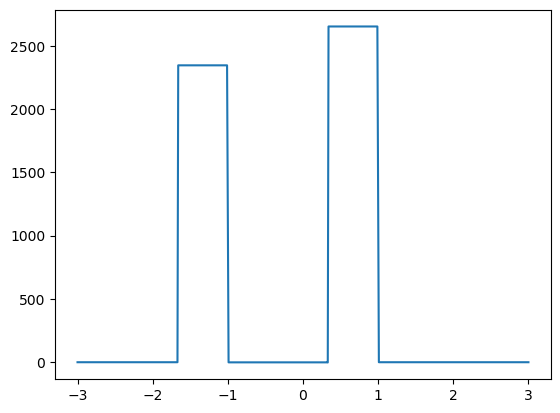

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000000F51B48>

In [28]:
plot(a1,a2)